In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(index=range(2015,2025))
# y = siniestralidad agregada
df['y'] = [50590200, 51879700, 53274900, 56428300, 58587300, 60198900, 65437200, 69582700, 72414300, 75971000] # Sinies
# x = primas imputadas
df['x'] = [53625600, 53446600, 54066500, 57145800, 60930800, 61222200, 68054700, 68886900, 73500500, 77490500] # Primas
df

,y,x
2015,50590200,53625600
2016,51879700,53446600
2017,53274900,54066500
2018,56428300,57145800
2019,58587300,60930800
2020,60198900,61222200
2021,65437200,68054700
2022,69582700,68886900
2023,72414300,73500500
2024,75971000,77490500


In [3]:
n_escenario = 'Linealidad'
sinies = df['y'].to_list()
primas = df['x'].to_list()

In [4]:
modelo = st.linregress(primas, sinies)
print(modelo)

coef = modelo.slope
intercept = modelo.intercept
error_estandar = modelo.stderr
p_valor = modelo.pvalue
print('coef: ', coef)
print('error_estandar', p_valor)
print('R^2', modelo.rvalue **2)

LinregressResult(slope=1.0242691947643707, intercept=-2925563.634100713, rvalue=0.9929651873355397, pvalue=1.062471409938224e-08, stderr=0.04318284186178265, intercept_stderr=2736775.122598875)
coef:  1.0242691947643707
error_estandar 1.062471409938224e-08
R^2 0.9859798632603035


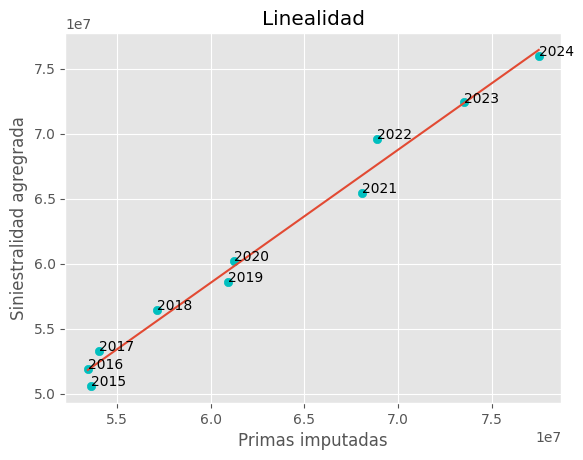

In [5]:
plt.style.use('ggplot')
plt.scatter(primas, sinies, color='c')
plt.title(n_escenario)
plt.xlabel('Primas imputadas')
plt.ylabel('Siniestralidad agregrada')
x = np.linspace(min(primas), max(primas),500)
y = coef * x + intercept
plt.plot(x, y)
for i, txt in enumerate(list(df.index)):
    plt.annotate(txt, (primas[i], sinies[i]))
#plt.savefig(f'{n_escenario}.png')
#plt.show()

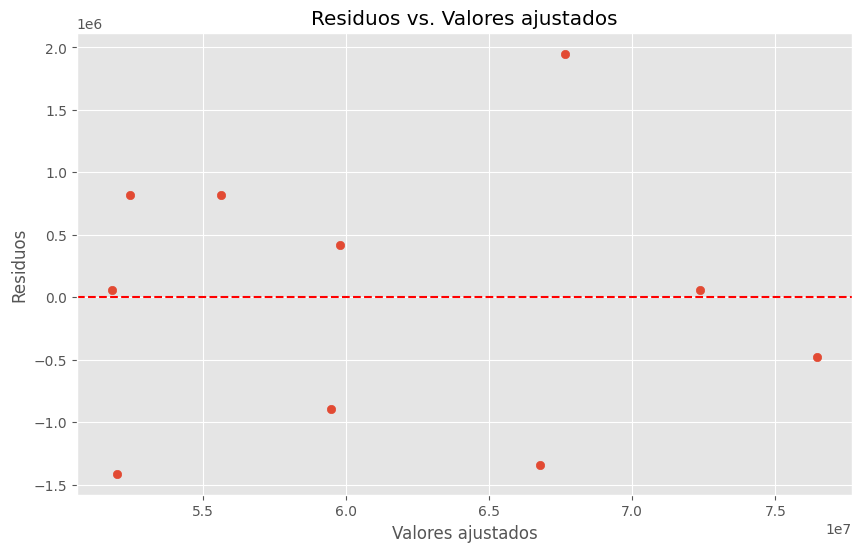

Breusch-Pagan test:
Lagrange multiplier statistic: 0.03789130113496575
p-value: 0.8456615704569836
f-value: 0.030428337839182393
f p-value: 0.8658555067619002

White test:
Lagrange multiplier statistic: 0.09220931705036572
p-value: 0.7613870337025155
f-value: 0.07445398878605596
f p-value: 0.7918700406015233


In [6]:
# prompt: comprobación de la homocedasticidad de los errores
import statsmodels.api as sm

# Calculo de residuos
residuos = sinies - (coef * np.array(primas) + intercept)

# Plot residuos vs. Valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(coef * np.array(primas) + intercept, residuos)
plt.axhline(y=0, color='r', linestyle='--')  # Linea en y=0
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores ajustados")
plt.savefig('residuos.png')
plt.show()

# Breusch-Pagan test for heteroscedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(residuos, sm.add_constant(np.array(primas)))
print("Breusch-Pagan test:")
labels = ['Lagrange multiplier statistic', 'p-value',
          'f-value', 'f p-value']
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

# White test for heteroscedasticity (more general than BP test)
white_test = sm.stats.diagnostic.het_white(residuos, sm.add_constant(np.array(primas)))
print("\nWhite test:")
labels = ['Lagrange multiplier statistic', 'p-value',
          'f-value', 'f p-value']
for label, value in zip(labels, white_test):
    print(f"{label}: {value}")

In [ ]:
# Shapiro-Wilk test for normality of residuals
shapiro_test = st.shapiro(residuos)
print("\nShapiro-Wilk test:")
print(f"W statistic: {shapiro_test[0]}")
print(f"p-value: {shapiro_test[1]}")


Shapiro-Wilk test:
W statistic: 0.9574043263289864
p-value: 0.7559189221149378
